In [1]:
#Code used to run individual transient simulation runs for five glaciers with dated moraines in Hawkins et al. (2023)

# Libs
import matplotlib.pyplot as plt
import numpy as np

# Locals
import oggm
import oggm.cfg as cfg
import xarray as xr
import salem
import os
import pandas as pd
import geopandas as gpd
from oggm.core import flowline, inversion
from oggm import tasks, utils, workflow, graphics
from oggm.workflow import execute_entity_task, gis_prepro_tasks, climate_tasks
# from oggm.utils import get_demo_file
# from oggm.utils import write_centerlines_to_shape
cfg.initialize()

2022-10-27 16:44:35: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2022-10-27 16:44:35: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2022-10-27 16:44:35: oggm.cfg: Multiprocessing: using all available processors (N=4)
2022-10-27 16:44:35: oggm.utils: Checking the download verification file checksum...
2022-10-27 16:44:36: charset_normalizer: ascii passed initial chaos probing. Mean measured chaos is 0.000000 %
2022-10-27 16:44:36: charset_normalizer: ascii is most likely the one. Stopping the process.
2022-10-27 16:44:36: oggm.utils: /Users/adamhawkins/.oggm/downloads.sha256.hdf changed or invalid, deleting.
2022-10-27 16:44:36: oggm.utils: Downloading https://cluster.klima.uni-bremen.de/data/downloads.sha256.hdf to /Users/adamhawkins/.oggm/downloads.sha256.hdf...
2022-10-27 16:45:25: oggm.utils: Done downloading.
2022-10-27 16:45:25: oggm.utils: Checking the download verification file checksum...
2022-10-27 16:45:26: cha

In [2]:
num = 1 #Remember, indexing starts at 0
glacier = ['Anderson','Mordor','Moraine_Hill','Keele_Peak','Arrowhead','Butterfly']
rgi_list = ['RGI60-02.12975','RGI60-02.12732','RGI60-02.12461','RGI60-02.13287','RGI60-02.13314','RGI60-02.12482']

# Local working directory (where OGGM will write its output)
# cfg.PATHS['working_dir'] = utils.gettempdir('/Users/adamhawkins/OGGM/OGGM_spinup_run'  + glacier[num], reset = True)
cfg.PATHS['working_dir'] = utils.gettempdir('/Users/adamhawkins/OGGM/Non_transient'  + glacier[num], reset = True)
# utils.mkdir(WORKING_DIR, reset=True) #True
# # Initialize OGGM and set up the default run parameters

# cfg.PATHS['working_dir'] = WORKING_DIR

# Use multiprocessing?
cfg.PARAMS['use_multiprocessing'] = False

# This is necessary for spinup runs!
cfg.PARAMS['store_model_geometry'] = True


if num == 0:
    cfg.PATHS['dem_file'] = '/Users/adamhawkins/Desktop/AND_DEM_mod.tif'
if num == 1 or num == 2 or num == 5:
    cfg.PATHS['dem_file'] = '/Users/adamhawkins/Desktop/MOR_aster_dem.tif'
if num == 3 or num == 4:
    cfg.PATHS['dem_file'] = '/Users/adamhawkins/Desktop/KP_AH_Aster_dem.tif'
#cfg.PATHS['working_dir'] = utils.gettempdir(dirname='OGGM-centerlines', reset=True)
#cfg.PATHS['working_dir'] = utils.gettempdir('/Users/adamhawkins/OGGM/OGGM_spinup_run/OGGM-centerlines', reset=True)


2022-10-27 16:45:50: oggm.cfg: PARAMS['store_model_geometry'] changed from `False` to `True`.


## This section is just for Moraine HIll glacier to merge the two sections into one glacier

In [36]:
if num ==2: 

    divides = gpd.read_file('/Users/adamhawkins/Documents/LIA_Yukon/OGGM/morainehillglacier/moraine_hill_glacier.shp') 

    cfg.PARAMS['border'] = 80

    mhill_new_shape_path = os.path.join(cfg.PATHS['working_dir'], 'mhill_divided.shp')
    divides.to_file(mhill_new_shape_path) #template for Nordic, divides for Illec

    from rgitools.funcs import compute_intersects
    new_intersects = compute_intersects(divides)  #for_intersects

    #store our intersects to use them with OGGM afterwards
    mhill_intersects_path = os.path.join(cfg.PATHS['working_dir'], 'mhill_divided_intersects.shp')
    new_intersects.to_file(mhill_intersects_path)

    # This is important! We tell OGGM to recompute the glacier area for us
    cfg.PARAMS['use_rgi_area'] = False
    # This is the default anyway, but we set it here to be sure
    cfg.PARAMS['use_intersects'] = True

    # This is important!
    cfg.set_intersects_db(mhill_intersects_path)
    print(mhill_intersects_path)

    # This is important again - standard OGGM 
    rgidf = gpd.read_file(mhill_new_shape_path)
    rgidf
else:
    print("not using Moraine Hill Glacier")

not using Moraine Hill Glacier


In [37]:
if num == 2:
    gdirs = workflow.init_glacier_directories(rgidf, reset=True, force=True)
    workflow.execute_entity_task(tasks.define_glacier_region, gdirs)
    divides.plot(edgecolor='k');
else:
    print("not using Moraine Hill Glacier")

not using Moraine Hill Glacier


## Now back to normal workflow

2022-10-27 16:46:03: oggm.cfg: PARAMS['border'] changed from `40` to `80`.
2022-10-27 16:46:05: oggm.workflow: init_glacier_directories from prepro level 0 on 1 glaciers.
2022-10-27 16:46:05: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 1 glaciers
2022-10-27 16:46:05: oggm.utils: /Users/adamhawkins/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/gdirs/oggm_v1.4/L1-L2_files/centerlines/RGI62/b_080/L0/RGI60-02/RGI60-02.12.tar verified successfully.
2022-10-27 16:46:05: oggm.utils: /Users/adamhawkins/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/ref_mb_params/oggm_v1.4/RGIV62/CRU/centerlines/qc3/pcp2.5/ref_tstars.csv verified successfully.
2022-10-27 16:46:05: oggm.utils: /Users/adamhawkins/OGGM/download_cache/cluster.klima.uni-bremen.de/~oggm/ref_mb_params/oggm_v1.4/RGIV62/CRU/centerlines/qc3/pcp2.5/ref_tstars_params.json verified successfully.
2022-10-27 16:46:05: oggm.workflow: Execute entity tasks [define_glacier_region] on 1 glaciers
2022-10-27 16:46:05: og

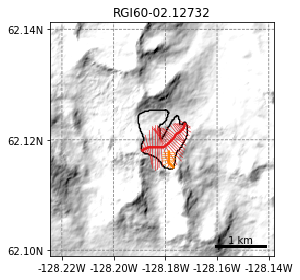

In [3]:
grad = [5.2] # mm w.e. m-1 from Bologna Glacier 2014-2015 (Ednie)

if num == 2:
    print("skipping glacier entity set-up, already completed for Moraine Hill Glacier")
else:
    # How many grid points around the glacier?
    # Make it large if you expect your glaciers to grow large
    cfg.PARAMS['border'] = 80
    
    fl_smooth = 1
    cfg.PARAMS['flowline_height_smooth']=fl_smooth
    cfg.PARAMS['smooth_window'] = 251.

    rgidf = utils.get_rgi_glacier_entities([rgi_list[num]]) ##Comment out with Moraine Hill
    gdirs = workflow.init_glacier_directories(rgidf, from_prepro_level=0)[0] ##Comment out with Moraine Hill


workflow.download_ref_tstars('https://cluster.klima.uni-bremen.de/~oggm/ref_mb_params/oggm_v1.4/RGIV62/CRU/centerlines/qc3/pcp2.5')
workflow.execute_entity_task(tasks.define_glacier_region, gdirs)
workflow.gis_prepro_tasks(gdirs)        # runs all flowline preprocessing tasks
workflow.climate_tasks(gdirs)           # runs all climate related tasks
workflow.inversion_tasks(gdirs)         #runs all ice thickness inversion tasks
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);
gdir = gdirs
tasks.init_present_time_glacier(gdir) ##This updates the mode_flowlines file and creates a stand-alone numerical glacier ready to run.
##########

ds_default = xr.open_dataset(gdir.get_filepath('gridded_data')).load()
ds_default.close()

graphics.plot_catchment_width(gdirs, add_intersects=True, corrected=True)

In [4]:
# Let's apply a linear MB instead
from oggm.core.climate import apparent_mb_from_linear_mb
workflow.execute_entity_task(tasks.apparent_mb_from_linear_mb, gdir, mb_gradient=grad);

from oggm.core.massbalance import LinearMassBalance
params = gdir.read_pickle('linear_mb_params')
print("linear SMB params:", params)

cfg.PARAMS['flowline_height_smooth'] = fl_smooth
workflow.inversion_tasks(gdirs)
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);
tasks.init_present_time_glacier(gdir) ##trying to update the model flowline

2022-10-27 16:46:20: oggm.workflow: Execute entity tasks [apparent_mb_from_linear_mb] on 1 glaciers
2022-10-27 16:46:20: oggm.core.climate: (RGI60-02.12732) apparent_mb_from_linear_mb
2022-10-27 16:46:20: oggm.workflow: Applying global task inversion_tasks on 1 glaciers
2022-10-27 16:46:20: oggm.workflow: Execute entity tasks [prepare_for_inversion] on 1 glaciers
2022-10-27 16:46:20: oggm.core.inversion: (RGI60-02.12732) prepare_for_inversion
2022-10-27 16:46:20: oggm.workflow: Execute entity tasks [mass_conservation_inversion] on 1 glaciers
2022-10-27 16:46:20: oggm.core.inversion: (RGI60-02.12732) mass_conservation_inversion
2022-10-27 16:46:20: oggm.workflow: Execute entity tasks [filter_inversion_output] on 1 glaciers
2022-10-27 16:46:20: oggm.core.inversion: (RGI60-02.12732) filter_inversion_output
2022-10-27 16:46:20: oggm.workflow: Execute entity tasks [distribute_thickness_per_altitude] on 1 glaciers
2022-10-27 16:46:20: oggm.core.inversion: (RGI60-02.12732) distribute_thicknes

linear SMB params: {'ela_h': 2073.1186264164066, 'grad': [5.2]}


2022-10-27 16:46:23: oggm.core.flowline: (RGI60-02.12732) init_present_time_glacier


In [5]:
from scipy import stats 
slope, intercept, r_value, p_value, std_err = stats.linregress(z, mb_on_z)

workflow.execute_entity_task(tasks.apparent_mb_from_linear_mb, gdir, mb_gradient=grad);

params = gdir.read_pickle('linear_mb_params')
print(params)
#max_mb Cap the mass balance to a certain value (unit: [mm w.e. yr-1], we use 2000 mm w.e.
l_mb_mod = LinearMassBalance(params['ela_h'], grad=params['grad'], max_mb=2000.)
l_mb_on_z = l_mb_mod.get_annual_mb(z) * cfg.PARAMS['ice_density'] * cfg.SEC_IN_YEAR

cfg.PARAMS['flowline_height_smooth'] = fl_smooth
workflow.inversion_tasks(gdirs)
workflow.execute_entity_task(tasks.distribute_thickness_per_altitude, gdirs);
tasks.init_present_time_glacier(gdir) ##trying to update the model flowline

NameError: name 'z' is not defined

In [6]:
# some model settings to do s quick spin up of the model
tbias = -2.5
years = 125
y0=1920
pf=2.5

tasks.run_constant_climate(gdir, nyears=years, temperature_bias=tbias, y0=y0, precipitation_factor=pf)

2022-10-27 16:46:31: oggm.core.flowline: (RGI60-02.12732) run_constant_climate
2022-10-27 16:46:31: oggm.core.flowline: (RGI60-02.12732) flowline_model_run


In [7]:
fmod = flowline.FileModel(gdir.get_filepath('model_geometry'))

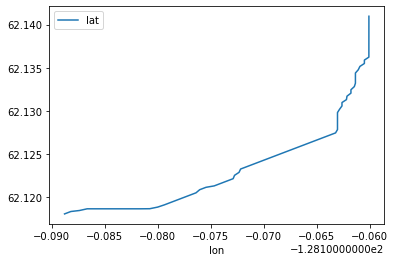

In [8]:
# Compute the specific MB for this glacier

gdirs = gdir
fls = gdirs.read_pickle('model_flowlines')

tmp = fls[1].to_geometry_dataset()

## save to netcdf file

# tmp.to_netcdf('/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/oggm_modified_files/'+glacier[num]+'flowline.nc')
tmp.to_netcdf('/Users/adamhawkins/Desktop/'+glacier[num]+'_flowline.nc', mode='w')

fl = fmod.fls[-1]  # Main flowline
i, j = fl.line.xy  # xy flowline on grid
lons, lats = gdirs.grid.ij_to_crs(i, j, crs='EPSG:4326')  # to WGS84

df_coords = pd.DataFrame(index=fl.dis_on_line*gdirs.grid.dx)
df_coords.index.name = 'Distance along flowline'
df_coords['lon'] = lons
df_coords['lat'] = lats
df_coords['bed_elevation'] = fl.bed_h
df_coords['ice_thick'] = fl.thick ### added ice thickness
df_coords.plot(x='lon', y='lat');

In [9]:
from tasks import process_last1000yr_data
num = 1
past_climate = 0
model = ['CCSM4','MIROC','MPI','MRI']

if past_climate == 0:
    cfg.PATHS['1000yr_temp_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/tas_Amon_CCSM4_0850_2005-005.nc'
    cfg.PATHS['1000yr_prec_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/pr_Amon_CCSM4_0850_2005-004.nc'
if past_climate == 1:
    cfg.PATHS['1000yr_temp_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/tas_Amon_MIROC-ESM_0850_2005.nc'
    cfg.PATHS['1000yr_prec_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/pr_Amon_MIROC-ESM_0850_2005.nc'
if past_climate == 2:
    cfg.PATHS['1000yr_temp_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/tas_Amon_MPI-ESM-P_0850_2005.nc'
    cfg.PATHS['1000yr_prec_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/pr_Amon_MPI-ESM-P_0850_2005.nc'
if past_climate == 3:
    cfg.PATHS['1000yr_temp_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/tas_Amon_MRI-ESM2-0_0850_2014-003.nc'
    cfg.PATHS['1000yr_prec_file'] = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/pr_Amon_MRI-ESM2-0_0850_2014-002.nc'

In [10]:
execute_entity_task(tasks.process_last1000yr_data, gdirs)

2022-10-27 16:48:25: oggm.workflow: Execute entity tasks [process_last1000yr_data] on 1 glaciers
2022-10-27 16:48:25: oggm.shop.gcm_climate: (RGI60-02.12732) process_last1000yr_data
2022-10-27 16:48:34: oggm.shop.gcm_climate: (RGI60-02.12732) process_gcm_data


[None]

In [12]:
def RMSE(mod, real):
    n=len(mod)
    return np.sqrt((((real-mod)**2)/n).sum()) ##This is the RMSE

0.9999999999999999


In [46]:
from csv import writer
outfile = '/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/oggm_modified_files/'+glacier[num]+'_'+model[past_climate]+'_runoutput.csv'

def append_list_as_row(outfile, row_contents):
    with open(outfile, 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(row_contents)

cfg.set_logging_config(logging_level='CRITICAL')

ys = 1000
ye = 2005

## parameters to vary
Tbias = np.linspace(0, 4, 16)
Pbias = np.linspace(2.0, 4.0, 10)
GlenA = cfg.PARAMS['glen_a']*np.linspace(1,1,1)

iter= len(Tbias)*len(Pbias)*len(GlenA) ##Number of iterations

## create an array of zeros to store results
params = np.zeros([iter, 4])

## set counter for row
z=0

## smoothing window
roll_yrs = 30

for tbias in Tbias:
    for pbias in Pbias:
        for glena in GlenA:
            try:
                execute_entity_task(tasks.run_from_climate_data, gdirs,
                        climate_filename='gcm_data', 
                        temperature_bias=tbias, 
                        precipitation_factor=pbias,
                        glen_a = glena,
                        ys=ys, ye=ye,
                        output_filesuffix='_pr_'+str(np.round(pbias, 2))+
                                           '_tbias_'+str(np.round(tbias, 2))+'_glena_'
                                    +str(np.round(glena, 2))+'_'+model[past_climate])

                utils.compile_glacier_statistics(gdirs)
                ds1 = utils.compile_run_output(gdirs, input_filesuffix='_pr_'+str(np.round(pbias, 2))+
                                               '_tbias_'+str(np.round(tbias, 2))+'_glena_'
                                               +str(np.round(glena, 2))+'_'+model[past_climate])

                ts = ds1.length.to_series()
                ts = ts.rolling(roll_yrs).min()
                ts.iloc[0:roll_yrs] = ts.iloc[roll_yrs]
            
                obs = pd.read_csv('/Users/adamhawkins/Documents/LIA_Yukon/Adam_OGGM/'+glacier[num]+'_intersections.csv')
                date = obs.iloc[0:5,0]
                dist = obs.iloc[0:5,1].values
                sim_length = ts.loc[date].values]
            
                print('Sim', z, tbias, 
                        pbias, glena, RMSE(sim_length, dist))
            
            ## write to numpy file 
                params[z,:] = tbias, pbias, glena, RMSE(sim_length, dist)
                row_contents = params[z,:]
                append_list_as_row(outfile, row_contents)

            except RuntimeError:
                print('Glacier shrank or grew too big!')
                continue
        
        ## increment counter
            z+=1

Sim 0 0.0 2.0 2.4e-24 1392.9168139851677
Sim 1 0.0 2.2222222222222223 2.4e-24 1197.391281850085
Sim 2 0.0 2.4444444444444446 2.4e-24 906.9794556241006
Sim 3 0.0 2.6666666666666665 2.4e-24 572.9762882222875
Sim 4 0.0 2.888888888888889 2.4e-24 1094.1474010217225
Sim 5 0.0 3.111111111111111 2.4e-24 1798.421032032986
Glacier shrank or grew too big!
Glacier shrank or grew too big!
Glacier shrank or grew too big!
Glacier shrank or grew too big!
Sim 6 0.26666666666666666 2.0 2.4e-24 1392.9168139851677
Sim 7 0.26666666666666666 2.2222222222222223 2.4e-24 1335.4922467384788
Sim 8 0.26666666666666666 2.4444444444444446 2.4e-24 1104.3447071740734
Sim 9 0.26666666666666666 2.6666666666666665 2.4e-24 798.117080180715
Sim 10 0.26666666666666666 2.888888888888889 2.4e-24 722.5242855496208
Sim 11 0.26666666666666666 3.111111111111111 2.4e-24 1175.2804446957289
Sim 12 0.26666666666666666 3.333333333333333 2.4e-24 1961.7671563716704
Glacier shrank or grew too big!
Glacier shrank or grew too big!
Glacier

Sim 123 3.466666666666667 3.333333333333333 2.4e-24 1392.9168139851677
Sim 124 3.466666666666667 3.5555555555555554 2.4e-24 1392.9168139851677
Sim 125 3.466666666666667 3.7777777777777777 2.4e-24 1392.9168139851677
Sim 126 3.466666666666667 4.0 2.4e-24 1392.9168139851677
Sim 127 3.7333333333333334 2.0 2.4e-24 1392.9168139851677
Sim 128 3.7333333333333334 2.2222222222222223 2.4e-24 1392.9168139851677
Sim 129 3.7333333333333334 2.4444444444444446 2.4e-24 1392.9168139851677
Sim 130 3.7333333333333334 2.6666666666666665 2.4e-24 1392.9168139851677
Sim 131 3.7333333333333334 2.888888888888889 2.4e-24 1392.9168139851677
Sim 132 3.7333333333333334 3.111111111111111 2.4e-24 1392.9168139851677
Sim 133 3.7333333333333334 3.333333333333333 2.4e-24 1392.9168139851677
Sim 134 3.7333333333333334 3.5555555555555554 2.4e-24 1392.9168139851677
Sim 135 3.7333333333333334 3.7777777777777777 2.4e-24 1392.9168139851677
Sim 136 3.7333333333333334 4.0 2.4e-24 1392.9168139851677
Sim 137 4.0 2.0 2.4e-24 1392.91

In [18]:
#This section is a test of our OGGM-derived results compared to another simple flowline from Jarosch et al. (2013)

from numba import *

adam = xr.open_dataset('/Users/adamhawkins/Desktop/'+glacier[num] + '_flowline.nc')

B = adam['bed_h'].to_numpy()
S = adam['surface_h'].to_numpy()
W = adam['widths_m'].to_numpy()
H = S -B 
dx = 41 
X = (adam['x'] * dx).to_numpy()

W= np.nan_to_num(W)
W[W ==0] = 400.  ##arbitrarily setting width to 400 m rather than 0 from OGGM output when glacier is beyond modern limits. 
H= np.nan_to_num(H)

S_obs = S.copy()

## This code block has been modified from 
## Jarosch et al., (2013) www.the-cryosphere.net/7/229/2013/
## and python code presented in the supplement of that paper.


# set the intial ice surface S to the bed elevation. 
S = B
Nx = len(S)

# finite difference indices. k is used in this 1D example.
# Note that python starts counting vector entries with 0 instead of 1, as e.g. MATLAB does
k = np.arange(0,Nx)
kp = np.hstack([np.arange(1,Nx),Nx-1])  ##Adam note: what does kp/km do?
km = np.hstack([0,np.arange(0,Nx-1)])


ablation = 0.007 #0.075 #0.01
accum = 0.006 #0.003 #0.005
ELA = 2058 #1800 for Anderson

## This function is where the magic happens.
## Given a range of time (Nt), surface (S), bed (B)
## width (W), Gamma (constants), and pertubation of Bn (dBn)
## It solve the continuity equation and returns H and S.

@jit(nopython=True)
def solve_it(Nt, S, B, W, Gamma, delta_Bn):
    
    ## stability criteria to ensure 
    ## result does not blow up if ice flux is large
    c_stab = 0.165
       
    
    for t in range(int(Nt)+1):
        stab_t = 0.
        
#         b_dot = -4.384e-06 * S**2 + 0.02671*S - 38.42 + delta_Bn
        
        b_dot = (S - ELA) * ablation
        indices = np.where((S - ELA) > 0)
        b_dot[indices] = (S[indices] - ELA)* accum
        

        while stab_t < dt:
            H = S - B
            
            W_bed = W - 2*H  ##Trapezoidal bed
            
            W_new = W_bed + 2*H 
            
            H_up = 0.5 * ( H[kp] + H[k] )
            H_dn = 0.5 * ( H[k] + H[km] )

            W_new_up = 0.5 * ( W_new[kp] + W_new[k] )
            W_new_dn = 0.5 * ( W_new[k]  + W_new[km])

            s_grad_up = ((S[kp]-S[k])**2. / dx**2.)**((n-1.)/2.)
            s_grad_dn = ((S[k]-S[km])**2. / dx**2.)**((n-1.)/2.)

            D_up = Gamma * H_up**(n+2) * s_grad_up * W_new_up
            D_dn = Gamma * H_dn**(n+2) * s_grad_dn * W_new_dn
            
            #explicit time stepping scheme
            dt_stab =  np.divide(c_stab * dx**2,  np.maximum(np.max(np.absolute(D_up)), np.max(np.absolute(D_dn))))   #denom )
            
            dt_use = np.minimum(dt_stab,dt-stab_t)

            stab_t = stab_t + dt_use
           
            div_q = 1/W_new[k] *  ( (D_up * (S[kp] - S[k])/dx - D_dn * (S[k] - S[km])/dx)/ dx )
            
            S =  S[k] + (b_dot + div_q)*dt_use
            
            S = np.maximum(S,B)

        if t%50 == 0.0:
            print('Year:', t)
            print('stable t:', stab_t) 
            print('Volume [km3]:', (W*H).sum()*dx*1e-9)
            #break 
    H = S - B 
    
    return(S, H)


In [19]:
## define some parameters for the model
# Define some parameters for 
A = 7.5738e-17 ## Ice stiffness parameter (Pa^-3 yr^-1)
n = 3.0        ## Glen's flow law exponent
g = 9.81       ## Gravitational acceleration
rho = 918.     ## Ice density 

## define a variable Gamma that is bunch a constants for
## model execution 
Gamma = 2.*A*(rho*g)**n / (n+2) # we introduce Gamma to shorten the equations.

## intial time step of 1 year
## and run for 400 years
dt = 1.0
Nt = 400       


## READ THIS 
## This variable (delta_Bn) is the one that should be changed 
## during your experiments. It reflects a mass 
## balance pertubation from the observed mass balance
## gradient of the glacier.

delta_Bn = 1.0 ##0.52 for modern ## changes in Bn in terms of m w.e. 

## start with no ice
S = B

S, H = solve_it(Nt, S, B, W, Gamma, delta_Bn)


Year: 0
stable t: 1.0
Volume [km3]: 0.0
Year: 50
stable t: 1.0
Volume [km3]: 0.005721460992283203
Year: 100
stable t: 1.0
Volume [km3]: 0.012744760653212655
Year: 150
stable t: 1.0
Volume [km3]: 0.01918045105137945
Year: 200
stable t: 1.0
Volume [km3]: 0.023465816584905482
Year: 250
stable t: 1.0
Volume [km3]: 0.026587814079563277
Year: 300
stable t: 1.0
Volume [km3]: 0.029227235748572857
Year: 350
stable t: 1.0
Volume [km3]: 0.03174867598957823
Year: 400
stable t: 1.0
Volume [km3]: 0.03413414773040664


/Users/adamhawkins/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/coding/times.py:144: SerializationWarning: Ambiguous reference date string: 850-1-1. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0850-1-1). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/Users/adamhawkins/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/adamhawkins/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime 

<xarray.DataArray 'temp' (time: 13860)>
array([ -6.657465, -29.399591, -32.619225, ...,   9.138428,   7.68532 ,
         1.340746], dtype=float32)
Coordinates:
  * time     (time) object 0850-10-16 00:00:00 ... 2005-09-01 00:00:00
Attributes:
    units:      degC
    long_name:  2m temperature at height ref_hgt
[ 0.08992244  0.42181765  0.52229462 ... -1.79571317 -0.51605931
  4.3195974 ]


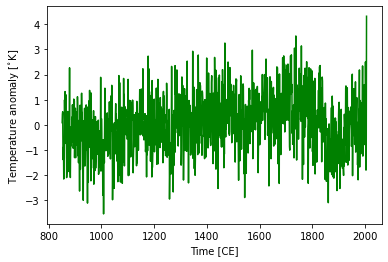

In [20]:
import pandas as pd
fpath_temp = '/Users/adamhawkins/Desktop/Mordor_gcm_data.nc'
tempds = xr.open_dataset(fpath_temp)
temp = tempds['temp']
print (temp)

##Need to get temperature array into mean annual temps, not monthly. 
month_length = tempds.time.dt.days_in_month

wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
wgts

cond = temp.isnull()
ones = xr.where(cond, 0.0, 1.0)
temp_sum = (temp * wgts).resample(time="AS").sum(dim="time")
ones_sum = (ones * wgts).resample(time="AS").sum(dim="time")
AnTemp = temp_sum / ones_sum

# print(AnTemp)

Temp_his = AnTemp.loc["1955-01-01":"1985-01-01"] # climate preceding the airphoto record
T = Temp_his.to_numpy()
AvgT = np.mean(T)

dT = AnTemp - AvgT ## this line and below commented out for non-transit run
dT = dT.to_numpy()
dT = dT[1:]
# dT = np.linspace(0,0, 1155)
print(dT)


time = np.linspace(851, 2005, 1155)  #Temp at yr 850 is super low (-15 C dT), so omitting.

## Example what this record looks like through time
plt.plot(time, dT, 'g-')
plt.xlabel('Time [CE]')
plt.ylabel('Temperature anomaly [$^{\circ}$K]')
plt.show()


ablation = 0.007#0.01
accum = 0.006 #0.005

b_dot = np.zeros_like(S)

b_dot = (S - ELA) * ablation

indices = np.where((S - ELA) > 0)
b_dot[indices] = (S[indices] - ELA)* accum


In [21]:
@jit(nopython=True)
def solve_it_transient(Nt, S, B, W, Gamma, dT):
    
    ## stability criteria to ensure 
    ## result does not blow up if ice flux is large
    c_stab = 0.165
    
    ## set up some empty arrays
    Distance = np.linspace(0, Nt, Nt)*0.0
    Min_elev = np.linspace(0, Nt, Nt)*0.0
    Ice_vol  = np.linspace(0, Nt, Nt)*0.0
    
    #dBn = dT * dBn_dT
    ## Create change in ELA from dT
    
    
    for t in range(int(Nt)+1):
        
        #b_dot = b_dot + dBn[t]  #-4.384e-06 * S**2 + 0.02671*S - 38.42 + dBn[t]
        
        ## instead of creating a b_dot[t] series create 
        ## a time varying ELA change based on temperature 
        ## using standard lapse rate (6.5K/km)
        
        ELA = 2058 + dT[t]/0.0065
        
        b_dot = (S - ELA) * ablation
        indices = np.where((S - ELA) > 0)
        b_dot[indices] = (S[indices] - ELA)* accum
        
        stab_t = 0.1
        
        while stab_t < dt:
            H = S - B

            W_bed = W - 2*H
            
            W_new = W_bed + 2*H 
            
            H_up = 0.5 * ( H[kp] + H[k] )
            H_dn = 0.5 * ( H[k] + H[km] )

            W_new_up = 0.5 * ( W_new[kp] + W_new[k] )
            W_new_dn = 0.5 * ( W_new[k]  + W_new[km])

            s_grad_up = ((S[kp]-S[k])**2. / dx**2.)**((n-1.)/2.)
            s_grad_dn = ((S[k]-S[km])**2. / dx**2.)**((n-1.)/2.)

            D_up = Gamma * H_up**(n+2) * s_grad_up * W_new_up
            D_dn = Gamma * H_dn**(n+2) * s_grad_dn * W_new_dn
            
            #explicit time stepping scheme
            dt_stab =  np.divide(c_stab * dx**2,  np.maximum(np.max(np.absolute(D_up)), np.max(np.absolute(D_dn))))   #denom )
            
            dt_use = np.minimum(dt_stab,dt-stab_t)

            stab_t = stab_t + dt_use
           
            div_q = 1/W_new[k] *  ( (D_up * (S[kp] - S[k])/dx - D_dn * (S[k] - S[km])/dx)/ dx )
            
            S =  S[k] + (b_dot + div_q)*dt_use

            S = np.maximum(S,B)
            
            stab_t_old = stab_t
            
        if t%1 == 0.0: 

            #print('Volume [km3]:', (W*H).sum()*dx*1e-9)

            if H.sum() > 0:
                #print('Volume [km3]:', (W*H).sum()*dx*1e-9)
                Ice_vol[t]  = (W*H).sum()*dx*1e-9
                Distance[t] = np.max(X[H>0])
                Min_elev[t] = np.min(S[H>0])

            # else: 
            #     Ice_vol[t]  = 0
            #     Distance[t] = 0
            #     Min_elev[t] = 0
            #     H = np.zeros_like(B)
            #     S = B

        if t%50 == 0.0:
            print('Year [CE]:', t + 1000)
            print('stable t:', stab_t_old) 
            if H.sum() > 0:
                print('Volume [km3]:', (W*H).sum()*dx*1e-9)
            else:  
                print('Glacier disappeared :( !!!!')

    H = S - B 
   
    print(b_dot.mean())
    
    return(S, H, Distance, Min_elev, Ice_vol)

In [22]:
# finite difference indices. k is used in this 1D example.
# Note that python starts counting vector entries with 0 instead of 1, as e.g. MATLAB does
Nx  = len(S)
k   = np.arange(0,Nx)
kp  = np.hstack([np.arange(1,Nx),Nx-1])
km  = np.hstack([0,np.arange(0,Nx-1)])


## define some parameters for the model
# Define some parameters for 
A   = 7.5738e-17 ## Ice stiffness parameter (Pa^-3 yr^-1)
n   = 3.0        ## Glen's flow law exponent
g   = 9.81       ## Gravitational acceleration
rho = 918.     ## Ice density 

## define a variable Gamma that is bunch a constants for
## model execution 
Gamma = 2.*A*(rho*g)**n / (n+2) # we introduce Gamma to shorten the equations.

## start with modern extent of the glacier (reduces spin-up time)
S = B  #+ H  #_obs

## clear b_dot from previous runs
#b_dot = np.zeros_like(B)

dt = 1.0
Nt = 1155

## use global dBn_dT (mass balance, temperature sensitivity)  m w.e. K^-1
#dT = 1.0
#dBn_dT = -0.6

S, H, Distance, Min_elev, Ice_vol = solve_it_transient(Nt, S, B, W, Gamma, dT)


Year [CE]: 1000
stable t: 1.0
Glacier disappeared :( !!!!
Year [CE]: 1050
stable t: 1.0
Volume [km3]: 0.009282616142800763
Year [CE]: 1100
stable t: 1.0
Volume [km3]: 0.025178719803614632
Year [CE]: 1150
stable t: 1.0
Volume [km3]: 0.044122353492384137
Year [CE]: 1200
stable t: 1.0
Volume [km3]: 0.05942502104745643
Year [CE]: 1250
stable t: 1.0
Volume [km3]: 0.051946698071237966
Year [CE]: 1300
stable t: 1.0
Volume [km3]: 0.044648978888723885
Year [CE]: 1350
stable t: 1.0
Volume [km3]: 0.04001491567926684
Year [CE]: 1400
stable t: 1.0
Volume [km3]: 0.04059379341221617
Year [CE]: 1450
stable t: 1.0
Volume [km3]: 0.036149919523896755
Year [CE]: 1500
stable t: 1.0
Volume [km3]: 0.032493767230816185
Year [CE]: 1550
stable t: 1.0
Volume [km3]: 0.028758108931441442
Year [CE]: 1600
stable t: 1.0
Volume [km3]: 0.01630593372095673
Year [CE]: 1650
stable t: 1.0
Volume [km3]: 0.007108878666028951
Year [CE]: 1700
stable t: 1.0
Volume [km3]: 0.013130904148096735
Year [CE]: 1750
stable t: 1.0
Volume